# Wine Consumption and Winery Density Effects on Health and Housing



* Determine which plot would best visualize each of the 4 datasets below, and build out those plots.



In [40]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
from pprint import pprint

In [38]:
wine_regions_df = pd.read_csv(os.path.join("..","Data","Raw","Wine_Regions.csv"))
total_wine_producers_df = pd.read_csv(os.path.join("..","Data","Clean",
                                                   "bonded_wine_producers_by_state_1999_june_2019_clean.csv"))

In [39]:
# wine_regions_df.sort_values("Vineyards", ascending=False).head(10)["Vineyards"]
total_wine_producers_df.head()



,STATE,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,Through 3/31/2019,Through 6/30/2019,Through 9/30/2019
0,AK,4,4,4,4,4,6,6,9,9,...,8,10,9,6,7,7,10,10,11,12
1,AL,4,5,6,5,5,5,8,8,9,...,18,21,25,29,33,37,42,42,47,48
2,AR,11,11,10,10,10,8,8,11,13,...,20,25,29,30,30,34,36,36,35,35
3,AZ,12,10,11,13,13,19,21,27,33,...,58,66,71,75,87,94,111,118,122,125
4,CA,"1,364","1,450","1,562","1,704","1,869","2,059","2,275","2,447","2,687",...,"3,754","4,061","4,285","4,416","4,653","4,836","5,217","5,309","5,364","5,443"


In [27]:
top_vineyards = wine_regions_df.sort_values("Vineyards",ascending=False).\
head(20)[["Region Name","Vineyards"]]
top_vineyards["Region Name"]

88              North Coast
90          Northern Sonoma
162       Willamette Valley
139            Sonoma Coast
22            Central Coast
112    Russian River Valley
87              Napa Valley
141           Sonoma Valley
33          Columbia Valley
96              Paso Robles
1          Alexander Valley
42         Dry Creek Valley
25       Chehalem Mountains
83                 Monterey
143         Southern Oregon
57             Green Valley
49       Eola - Amity Hills
158      Walla Walla Valley
56             Grand Valley
165         Yamhill-Carlton
Name: Region Name, dtype: object

([<matplotlib.axis.XTick at 0x20ad83fb198>,
 <a list of 20 Text xticklabel objects>)

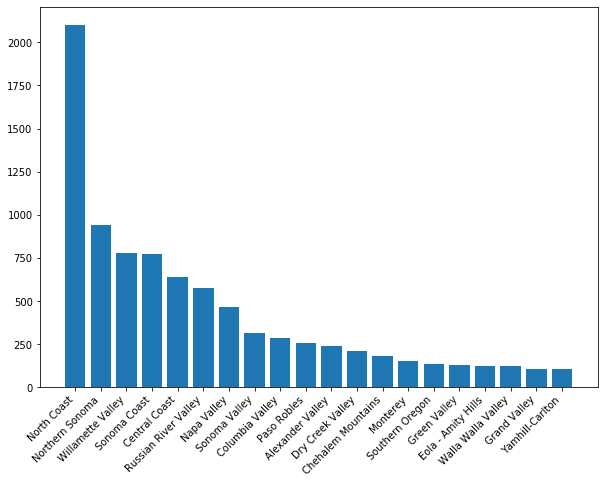

In [35]:
xticks = np.arange(20)
plt.figure(figsize=(10,7))
plt.bar(xticks, top_vineyards["Vineyards"])
plt.xticks(xticks, top_vineyards["Region Name"], rotation=45, ha="right")


In [160]:
# a single request to get the names of the columns
crash_params = \
    {
        "fromCaseYear" : "2011",
        "toCaseYear" : "2011",
        "state" : "6",
        "county" : "",
        "format": "json"
    }
response = requests.get(crashes_loc_base_url, params=crash_params).json()
crash_df = pd.DataFrame(response["Results"][0])
# removing all rows:
crash_df = crash_df.drop(crash_df.index[:])
# crash_df = crash_df.append(response["Results"][0])
crash_df.head()

,CITY,CITYNAME,COUNTY,COUNTYNAME,CaseYear,FATALS,LATITUDE,LONGITUD,STATE,STATENAME,ST_CASE,TOTALVEHICLES,TWAY_ID,TWAY_ID2,VE_FORMS


In [ ]:
crashes_loc_base_url = "https://crashviewer.nhtsa.dot.gov/CrashAPI/crashes/GetCrashesByLocation?"

nCrashes = [None]*54
c = 0
# California, Coloarado, Idaho, Oregon, Texas, Washington
state_ids = [6, 8, 16, 41, 48, 53]
for year in range(2010, 2019, 1):
    for state in state_ids:
        crash_params = \
        {
            "fromCaseYear" : str(year),
            "toCaseYear" : str(year),
            "state" : str(state),
            "county" : "",
            "format": "json"
        }
        
        response = requests.get(crashes_loc_base_url, params=crash_params)
        response_json = response.json()
        if response.status_code == 200:
            try:
                crash_df = crash_df.append(response_json["Results"][0])
                nCrashes[c] = len(response_json["Results"][0])
            except IndexError: 
                continue
        c += 1

In [173]:
crash_df.shape

(150366, 15)

In [177]:
crash_df.to_csv(os.path.join("..", "Data", "Raw", "crashes_top_6_wine_states_2010-2018.csv"))